# Animating computations using the hierarchical fiber abstraction

The following cells provide an introduction to the methods provided to animate the activity in a computation.

First, we include some libraries and provide some dropdown lists to select the display style and type of animation.

In [1]:
# Run boilerplate code to set up environment

%run ../prelude.py --style=tree --animation=movie


interactive(children=(Dropdown(description='style', options=('tree', 'uncompressed', 'tree+uncompressed'), val…

Button(description='Run all cells below', style=ButtonStyle())

## Animating a computation

The codebase provides some utility functions to animate the accesses to a tensor. The following examples use some convenience functions provided in __prelude.py__ to generate the aninamtions. The behind-the-scenes class used is **TensorCanvas**, which can be used directly.

## Create a tensor

Just create a tensor to be used in the animation

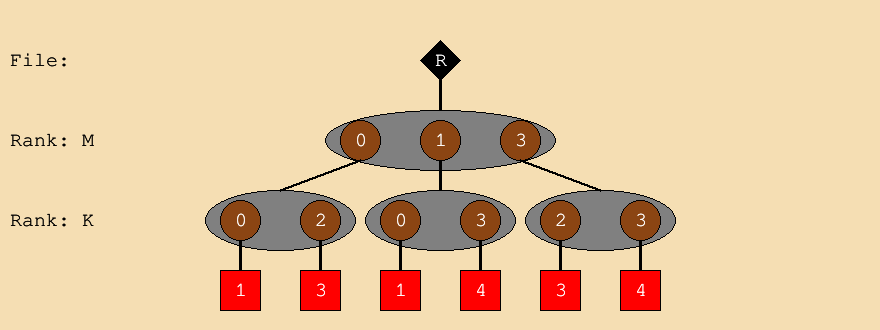

In [4]:
# Traverse a tensor
import os 
os.environ['FIBERTREE_FONT'] = '/Library/Fonts/FreeMono.ttf'


a = Tensor.fromYAMLfile(datafileName("matrix-a.yaml"))

displayTensor(a)

## Animate traversal of a tensor

The following cell animates the traversal of a rank-2 tensor. The key methods used are:

- **createCanvas(tensor...)** - create a canvas to draw the animation on. The arguments are the tensors that are to be displayed in the animation

- **canvas.addFrame(highlight...)** - add a frame to the canvas. The arguments provide the information needed to highlight specific points in each tensor being displayed in this frame. In this example, we just use a the coordinates of a single point as the highlight. See the [tensor highlighting](./highlight-multiPE.ipynb) notebook for details on how to specifiy more complex highlights (Note: addframe does not take a dictionary of PEs to highlight. More sophisticated PE highlighting is accomplished with the **canvas.addActivity()** method)

- **displayCanvas(canvas)** - Turn the cavnas into a movie (or spacetime diagram) to be displayed. This convenience functions displays the result in the notebook.

In [5]:

canvas = createCanvas(a)

a_m = a.getRoot()

for m, (a_k) in a_m:
    print(f"({m}, {a_k})")
    for k, (a_val) in a_k:
        print(f"Processing: ({k}, {a_val})")
        canvas.addFrame((m,k))

displayCanvas(canvas)

(0, F(K)/[(0 -> <1>) (2 -> <3>) ])
Processing: (0, <1>)
Processing: (2, <3>)
(1, F(K)/[(0 -> <1>) (3 -> <4>) ])
Processing: (0, <1>)
Processing: (3, <4>)
(3, F(K)/[(2 -> <3>) (3 -> <4>) ])
Processing: (2, <3>)
Processing: (3, <4>)


  0%|          | 0/8 [00:00<?, ?it/s]

## Spacetime animtation

Animtations using `canvas.addActivity()` - TBD

## Testing area

For running alternative algorithms